# XAI - homework 1
_Mateusz Biesiadowski **mb406097**_

## Imports

In [105]:
import os

import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix

In [12]:
#@title Set Credentials

kaggle_username = '' #@param {type:"string"}
kaggle_api_key = ''#@param {type:"string"}

with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write('{"username":"' + kaggle_username + '","key":"' + kaggle_api_key + '"}')

os.system("chmod 600 /root/.kaggle/kaggle.json")

0

## Data

### Download dataset

In [15]:
import kaggle

!kaggle datasets download -d rashikrahmanpritom/heart-attack-analysis-prediction-dataset
!unzip /content/heart-attack-analysis-prediction-dataset.zip

heart-attack-analysis-prediction-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  /content/heart-attack-analysis-prediction-dataset.zip
  inflating: heart.csv               
  inflating: o2Saturation.csv        


### Get data 

In [59]:
df = pd.read_csv("/content/heart.csv")

### Basic analysis



- Age: Age of the patient
- Sex: Sex of the patient
- exang: exercise induced angina (1 = yes; 0 = no)
- ca: number of major vessels (0-3)
- cp: Chest Pain type chest pain type
  - Value 1: typical angina
  - Value 2: atypical angina
  - Value 3: non-anginal pain
  - Value 4: asymptomatic
- trtbps: resting blood pressure (in mm Hg)
- chol: cholestoral in mg/dl fetched via BMI sensor
- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- rest_ecg: resting electrocardiographic results
  - Value 0: normal
  - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
  - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalach: maximum heart rate achieved
- target: 0= less chance of heart attack 1= more chance of heart attack


In [60]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [61]:
df.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

In [62]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [63]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Preprocessing

#### Config

In [76]:
CATEGORICAL_COLUMNS = ['cp', 'restecg', 'slp', 'caa', 'thall']
RANDOM_STATE = 42
TEST_SIZE = 0.33

### Check missing values

In [64]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

### One hot encoding

In [66]:
for col in CATEGORICAL_COLUMNS:
    one_hot = pd.get_dummies(df[col])
    one_hot = one_hot.add_prefix(col + "_")
    df.drop(col, axis=1)
    df = pd.concat([df, one_hot], axis=1)

In [67]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,...,slp_2,caa_0,caa_1,caa_2,caa_3,caa_4,thall_0,thall_1,thall_2,thall_3
0,63,1,3,145,233,1,0,150,0,2.3,...,0,1,0,0,0,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,0,0,0,1,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,1,0,0,0,0,0,0,1,0
3,56,1,1,120,236,0,1,178,0,0.8,...,1,1,0,0,0,0,0,0,1,0
4,57,0,0,120,354,0,1,163,1,0.6,...,1,1,0,0,0,0,0,0,1,0


### Split data

In [75]:
X, y = df.drop('output', axis=1), df.output

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

## Models

#### Evaluation

In [103]:
def train_eval_model(model_class, params={},
                     verbose=True, display_results=True):
    clf = model_class(**params)
    model_name = clf.__class__.__name__
    clf.fit(X_train, y_train)
    
    predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, predictions)
    cf_matrix = confusion_matrix(y_test, predictions)

    if verbose:
        print(f"{model_name} has {acc} accuracy.")

    if display_results:
        disp = ConfusionMatrixDisplay(cf_matrix, display_labels=clf.classes_)
        disp.plot()

### Logistic regression

LogisticRegression has 0.82 accuracy.


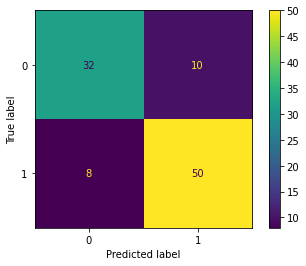

In [99]:
train_eval_model(LogisticRegression, {"random_state": RANDOM_STATE,
                                      "max_iter": 10000})

### KNN

KNeighborsClassifier has 0.66 accuracy.


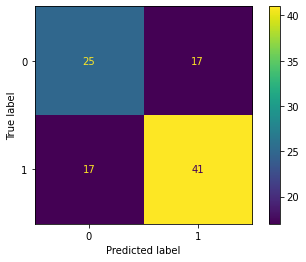

In [104]:
train_eval_model(KNeighborsClassifier)

### Random Forest

RandomForestClassifier has 0.84 accuracy.


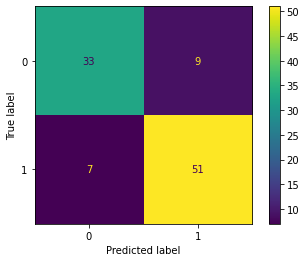

In [107]:
train_eval_model(RandomForestClassifier, {"random_state":RANDOM_STATE})

## Summary
The best results are achived by RandomForestClassifier **[84% accuacy]**, while the worst by KNeighborsClassifier **[66% accuracy]**.

I think the results may be improved, either by more extensive data preprosessing or by hyperparameters tuning.